<a href="https://colab.research.google.com/github/carlos-cui/data_analysis/blob/master/titanic%20data%20visualization/Visualizing_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualzing Titanic Data

I know, I know, we're all tired of the Titanic dataset but it's part of this exercise

I'll be the seaborn visualization library for visuals

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# we'll use the style used in by the fivethirtyeight website for visuals
plt.style.use('fivethirtyeight')

In [0]:
# we will be using the train dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/carlos-cui/data_analysis/master/titanic%20data%20visualization/train.csv')

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [0]:
# let's drop columns we won't be using for exploration
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
# we will also be dropping any rows with null values
titanic.dropna(inplace=True)

In [8]:
titanic.shape

(712, 8)

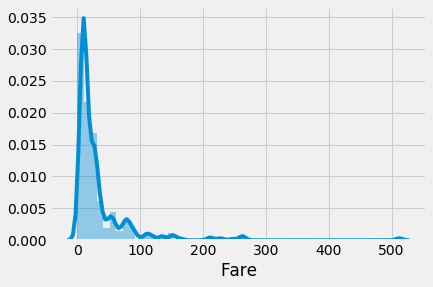

In [9]:
# let's biuld our first visual of the Fare amounts
sns.distplot(titanic['Fare'])
plt.show()

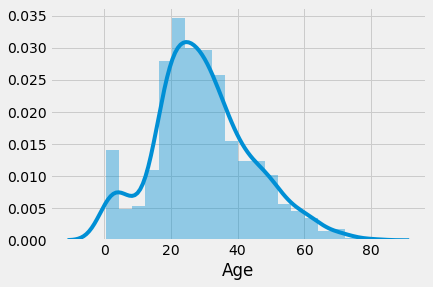

In [10]:
# and now a kernel density plot of ages
sns.distplot(titanic['Age'])

Text(0.5, 0, 'Age')

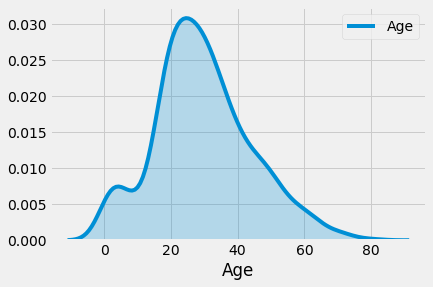

In [11]:
# visualizing only the kernal density plot and adding some shade under the line
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')

## Seaborn Style

We can set the seaborn_set_style() to one of the style sheets:
- darkgrid
- whitegrid
- dark
- white
- ticks

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


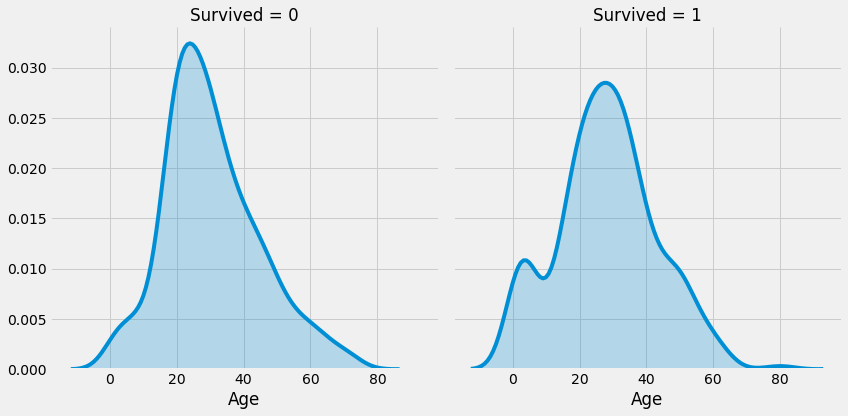

In [12]:
# Condition on unique values of the "Survived" column; 
# Passing in a value to col creates separate plots based on the values in that column
g = sns.FacetGrid(titanic, col="Survived", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


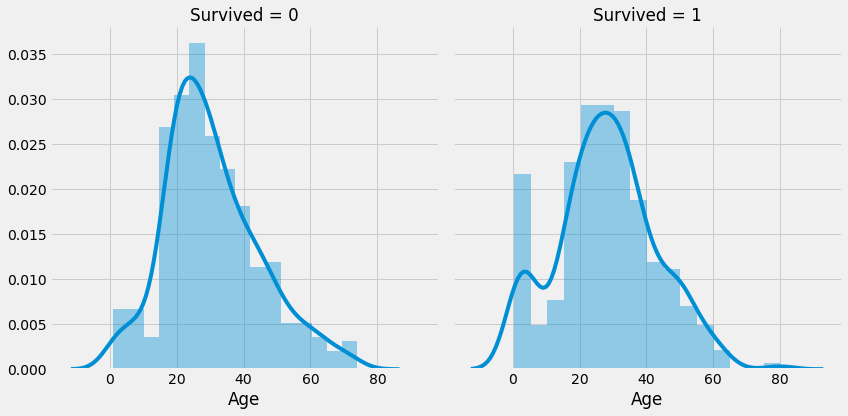

In [18]:
# same as above but using a different plot type
g = sns.FacetGrid(titanic, col="Survived", height=6)
g.map(sns.distplot, "Age")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


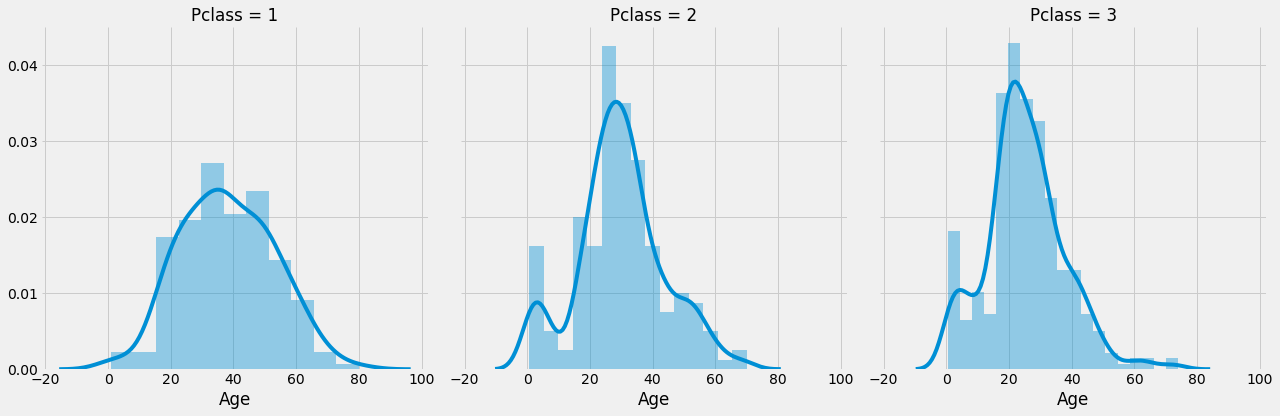

In [20]:
# distplot for classes and age
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.distplot, "Age")
sns.despine(left=True, bottom=True)

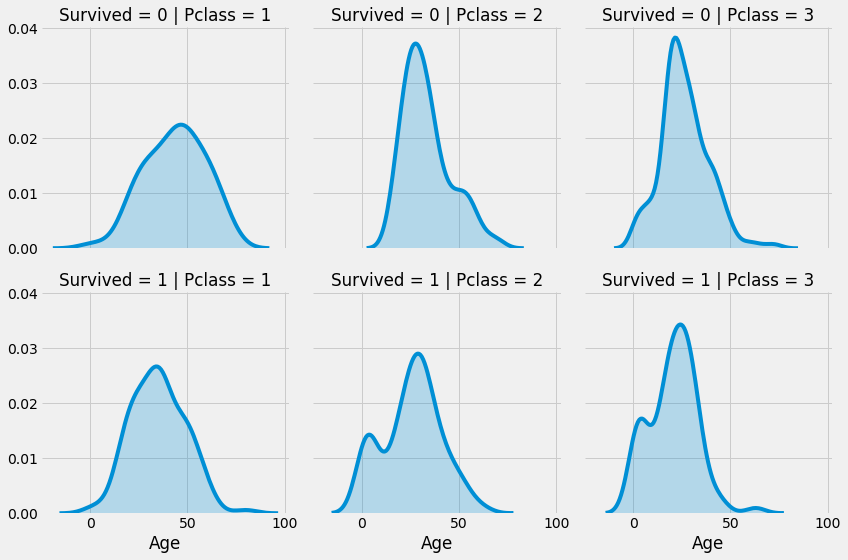

In [28]:
# creating conditional graphs accross columns and rows
# columns represent one condition and rows another
g = sns.FacetGrid(titanic, col="Pclass", row="Survived", height=4)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)

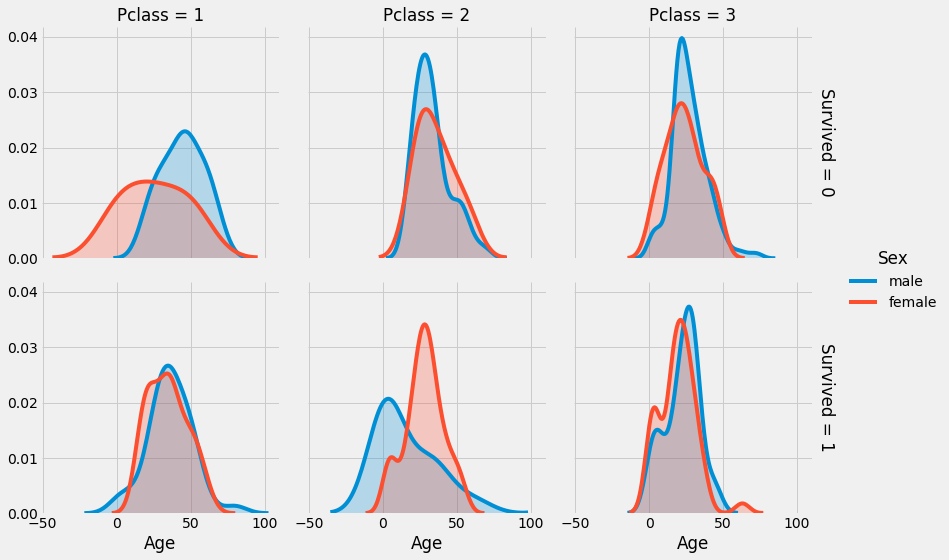

In [30]:
# we can use a third condition and use color hue to represent the third condition
# we can chaain add_legend to map in order to generate a legend for the hue
g = sns.FacetGrid(titanic, col='Pclass', row='Survived', hue='Sex', height=4, margin_titles=True)
g.map(sns.kdeplot, 'Age', shade=True).add_legend()
sns.despine(left=True, bottom=True)